In [1]:
import cv2

In [37]:
# !git clone --depth 1 https://github.com/Hzzone/MTLFace.git
# !mv MTLFace/python_package/* .
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image
import torch
import os.path as osp
torch.cuda.set_device(0)
import torch.nn.functional as F
from PIL import Image
from mtlface.modules import MTLFace
torch.autograd.set_grad_enabled(False)

pretrained model
https://drive.google.com/file/d/1OmfAjP3BAqVxaQ2pwyJuOYUHy_incMNd/view?usp=share_link
https://pan.baidu.com/s/1GT95OPNR-7GQPMSFFVqzeQ?pwd=wizs

In [9]:
# !pip install -U --no-cache-dir gdown --pre
# !gdown --id 1OmfAjP3BAqVxaQ2pwyJuOYUHy_incMNd -O mtlface_checkpoints.tar

In [2]:
!pip install Ninja
!echo "from mtlface.stylegan2.op import upfirdn2d, FusedLeakyReLU, fused_leaky_relu" > colab_init.py
!python colab_init.py

# Face Alignment

In [38]:
# !pip install dlib
from mtlface.face_aligment import face_process

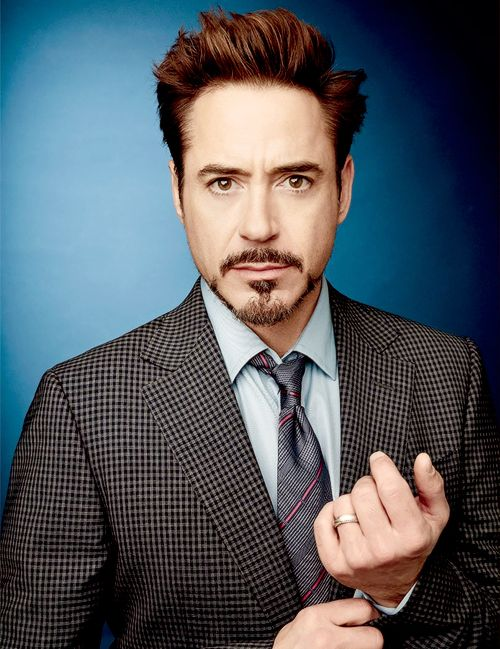

In [39]:
img_path = 'notebook/InputImage/rdj.jpg'
Image.open(img_path)


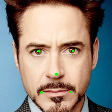

In [40]:
face_process(img_path, plot=True)


-----

In [7]:
torch.cuda.is_available()

True

In [8]:
mtlface = MTLFace().cuda().eval()
mtlface.load_state_dict(torch.load('mtlface_checkpoints.tar'))

Using C:\Users\csuma\AppData\Local\torch_extensions\torch_extensions\Cache\py310_cu121 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file C:\Users\csuma\AppData\Local\torch_extensions\torch_extensions\Cache\py310_cu121\fused\build.ninja...
Building extension module fused...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module fused...
Using C:\Users\csuma\AppData\Local\torch_extensions\torch_extensions\Cache\py310_cu121 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file C:\Users\csuma\AppData\Local\torch_extensions\torch_extensions\Cache\py310_cu121\upfirdn2d\build.ninja...
Building extension module upfirdn2d...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module upfirdn2d...


<All keys matched successfully>

## Images GPU loading

In [25]:
from PIL import Image
from torchvision import transforms
root = 'notebook/InputImage'
images = []
for fname in ['071A42.JPG', '046A10.JPG']:
     path = osp.join(root, fname)
     input_img = Image.open(path).convert("RGB")
     transform = transforms.Compose([
          transforms.Resize(112),
          transforms.ToTensor(),
          transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5], inplace=True)
     ])
     input_img = transform(input_img).unsqueeze(0)
     images.append(input_img.cuda())
images = torch.cat(images, dim=0)

In [50]:
from PIL import Image
import os
from torchvision import transforms
import torchvision.transforms.functional as TF


root = 'notebook/InputImage'  # Change 'input_image_folder' to your actual folder name
images = []

# List all image files in the folder
image_files = [f for f in os.listdir(root)]
print(f"LEnght of Images: {len(image_files)}")
# Move the transformation process and stacking operation to GPU
transform = transforms.Compose([
    transforms.Resize((112,112)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

for fname in image_files:
    path = os.path.join(root, fname)
    # Call face_process function to detect and align face
    aligned_face = face_process(path)
    # Apply transformations and move to GPU
    input_img = transform(aligned_face).unsqueeze(0).cuda()
    images.append(input_img)

# Stack the images along the batch dimension on GPU
images = torch.cat(images, dim=0)


LEnght of Images: 4


In [51]:
x_vec, x_age = mtlface.encode(images)

# Age Estimation

In [52]:
x_age

tensor([49.3500, 14.3796, 44.1631, 24.5375], device='cuda:0')

# Face Age Synthesis

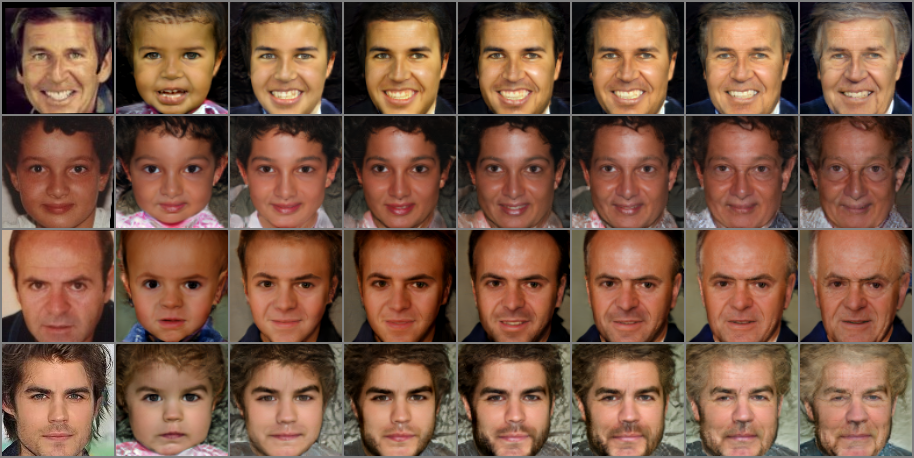

In [53]:
bs = images.size(0)
target_labels = torch.arange(7).cuda().unsqueeze(1).repeat(bs, 1).flatten()
repeat_images = images.unsqueeze(1).repeat(1, 7, 1, 1, 1).view(-1, 3, 112, 112)
outputs = mtlface.aging(repeat_images, target_labels).view(bs, 7, 3, 112, 112)
outputs = torch.cat([images.unsqueeze(1), outputs], dim=1).view(-1, 3, 112, 112)
to_pil_image(make_grid(outputs) * 0.5 + 0.5)

Python 3.10.12


In [3]:
!pip freeze

anyio @ file:///C:/b/abs_847uobe7ea/croot/anyio_1706220224037/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
arrow==1.3.0
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
async-lru @ file:///C:/b/abs_e0hjkvwwb5/croot/async-lru_1699554572212/work
attrs @ file:///C:/b/abs_35n0jusce8/croot/attrs_1695717880170/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_1671782804377/work
beautifulsoup4 @ file:///C:/b/abs_0agyz1wsr4/croot/beautifulsoup4-split_1681493048687/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
Brotli @ file:///C:/Windows/Temp/abs_63l7912z0e/croots/recipe/brotli-split_1659616056886/work
certifi @ file:///C:/b/abs_35d7n66oz9/croot/certifi_1707229248467/work/certifi
cffi @ file:///C:/b/abs_924gv1kxzj/croot/cffi_1700254355075/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
click @ file:/